In [2]:
!pip install pytesseract

In [4]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.80.0
  libgif 5.2.1 : libjpeg 9d : libpng 1.6.37 : libtiff 4.2.0 : zlib 1.2.11 : libwebp 1.2.0 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE


In [5]:
import cv2
import numpy as np

img = cv2.imread('./image/195900001.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

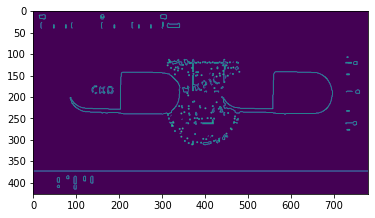

In [6]:
import pytesseract

# custom_config = r'--oem 3 --psm 6'
# pytesseract.image_to_string(img, config=custom_config)

from matplotlib import pyplot as plt
plt.figure()
plt.imshow(canny(opening(thresholding(get_grayscale(img)))))
plt.show()

In [9]:
pytesseract.image_to_string(canny(opening(thresholding(get_grayscale(img)))), lang='enf')

' \n\n \n\x0c'

In [10]:
pytesseract.image_to_string(img, lang='kor')

' \n\n \n\n이\n털 00000,\n\n0168 바10400020640021\n\n \n\n001 트라이\n\x0c'